In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_json('./train/data/story.json')

In [5]:
data.iloc[16]['sentences']

[['প্রায়',
  '১৪',
  'বৎসর',
  'পূর্ব্বে',
  'আমাদের',
  'স্কুলে',
  'একজন',
  'লক্ষ্ণৌ',
  'নিবাসী',
  'শিক্ষয়িত্রী',
  'ছিলেন',
  ',',
  'নাম',
  'আখতর',
  'জাঁহা',
  '।'],
 ['তাঁহার', 'তিনটি', 'কন্যাও', 'এই', 'স্কুলে', 'পড়িত', '।'],
 ['একদিন',
  'তিনি',
  'একালের',
  'মেয়েদের',
  'নির্লজ্জতার',
  'বিষয়',
  'আলোচনা',
  'প্রসঙ্গে',
  'নিজের',
  'মেয়েদের',
  'বেহায়াপনার',
  'কথা',
  'বলিয়া',
  'দুঃখ',
  'প্রকাশ',
  'করিলেন',
  '।'],
 ['কথায়',
  'কথায়',
  'নিজের',
  'বধূ-জীবনের',
  'একটা',
  'গল্প',
  'বলিলেনঃ',
  '“',
  'এগারো',
  'বৎসর',
  'বয়সে',
  'তাঁহার',
  'বিবাহ',
  'হইয়াছিল',
  '।'],
 ['শ্বশুরবাড়ী',
  'গিয়া',
  'তাঁহাকে',
  'এক',
  'নির্জ্জন',
  'কক্ষে',
  'থাকিতে',
  'হইত',
  '।'],
 ['তাঁহার',
  'এক',
  'ছোট',
  'ননদ',
  'দিনে',
  'তিন',
  'চার',
  'বার',
  'আসিয়া',
  'তাঁহাকে',
  'প্রয়োজন',
  'মত',
  'বাথ-রুমে',
  'পৌঁছাইয়া',
  'দিত',
  '।'],
 ['একদিন',
  'কি',
  'কারণে',
  'সে',
  'অনেকক্ষণ',
  'পর্য্যন্ত',
  'তাঁহার',
  'সংবাদ',
  'লয়',
  'নাই',
  '।'],
 [

In [6]:
data.iloc[7]['mention_clusters']

[[[1, 0, 0], [3, 0, 0], [6, 0, 0]], [[2, 3, 4], [3, 1, 1], [4, 5, 5]]]

In [7]:
data.iloc[7]['sentences']

[['এক', 'বাড়ীতে', 'আগুন', 'লাগিয়াছিল', '।'],
 ['গৃহিণী',
  'বুদ্ধি',
  'করিয়া',
  'তাড়াতাড়ি',
  'সমস্ত',
  'অলঙ্কার',
  'একটা',
  'হাত',
  'বাক্সে',
  'পুরিয়া',
  'লইয়া',
  'ঘরের',
  'বাহির',
  'হইলেন',
  '।'],
 ['দ্বারে',
  'আসিয়া',
  'দেখিলেন',
  'সমাগত',
  'পুরুষেরা',
  'আগুন',
  'নিবাইতেছে',
  '।'],
 ['তিনি',
  'তাহাদের',
  'সম্মুখে',
  'বাহির',
  'না',
  'হইয়া',
  'অলঙ্কারের',
  'বাক্সটী',
  'হাতে',
  'করিয়া',
  'ঘরের',
  'ভিতর',
  'খাটের',
  'নীচে',
  'গিয়া',
  'বসিলেন',
  '।'],
 ['তদবস্থায়',
  'পুড়িয়া',
  'মরিলেন',
  ',',
  'কিন্তু',
  'পুরুষের',
  'সম্মুখে',
  'বাহির',
  'হইলেন',
  'না',
  '।'],
 ['ধন্য', '!'],
 ['কুল-কামিনীর', 'অবরোধ', '!']]

In [8]:
for i in data.iloc[7]['mention_clusters']:
    print(len(data.iloc[7]['sentences'][0]))
    print(i)

5
[[1, 0, 0], [3, 0, 0], [6, 0, 0]]
5
[[2, 3, 4], [3, 1, 1], [4, 5, 5]]


In [9]:
def get_sentences_length(df, count):
  for i in range(len(df['sentences'])):
    length = 0
    for j in range(len(df['sentences'][i])):
      length += len(df['sentences'][i][j])
    count[length] += 1

In [38]:
import json
import sys
import collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


def mention_clusters_length(df, count):
  for i in range(len(df['mention_clusters'])):
    for j in range(len(df['mention_clusters'][i])):
      length = len(df['mention_clusters'][i][j])
      count[length] += 1

def sentences_length(df, count):
  for i in range(len(df['sentences'])):
    length = 0
    for j in range(len(df['sentences'][i])):
      length += len(df['sentences'][i][j])
    count[length] += 1

def total_token_count(df):
  tokens = 0
  for i in range(len(df)):
    for j in range(len(df['sentences'][i])):
      tokens += len(df['sentences'][i][j])
  return tokens

def total_mention_token_count(d):
  total_mention_token = 0
  if len(d) == 0: return 0
  for key, value in d.items():
    total_mention_token += key*value
  return total_mention_token

def mention_len_count(df):
  mention_len = {}
  for i in range(len(df)):
    for j in range(len(df['mention_clusters'][i])):
      length = len(df['mention_clusters'][i][j])
      if length != 1:
        for k in range(length):
          l = df['mention_clusters'][i][j][k][2]-df['mention_clusters'][i][j][k][1]
          if l not in mention_len.keys():
            mention_len[l] = 1
          else:
            mention_len[l] += 1
  return total_mention_token_count(mention_len)

def singleton_mention_len_count(df):
  mention_len = {}
  for i in range(len(df)):
    for j in range(len(df['mention_clusters'][i])):
      length = len(df['mention_clusters'][i][j])
      if length == 1:
        for k in range(length):
          l = df['mention_clusters'][i][j][k][2]-df['mention_clusters'][i][j][k][1]
          if l not in mention_len.keys():
            mention_len[l] = 1
          else:
            mention_len[l] += 1
  return total_mention_token_count(mention_len)

def token_positions(text, cluster):
  sentence_len = list(map(len, text))
  cluster = [list(x) for x in set(tuple(x) for x in cluster)]
  positions = []
  for i in range(len(cluster)):
    if cluster[i][0] == 0:
      positions.append(cluster[i][1])
    else:
      temp = sum(sentence_len[0:cluster[i][0]]) + cluster[i][1]
      positions.append(temp)
  return sorted(positions)

def cluster_distance(text, cluster):
  positions = token_positions(text, cluster)
  separation_dis = []
  for i in range(len(positions)-1):
    separation_dis.append(np.abs(positions[i] - positions[i+1]))
  return separation_dis

def standard(mean, data):
  s = 0
  for d,v in data.items():
    tem = abs(d-mean)*v
    s += v**2
  return s/sum(data.values())

def distance_category(df):
  distance_count = Counter()
  for i in range(len(df)):
    text = df['sentences'][i]
    clusters = df['mention_clusters'][i]
    for j in range(len(clusters)):
      dist = cluster_distance(text, clusters[j])
      for k in range(len(dist)):
        if dist[k] not in distance_count.keys():
          distance_count[dist[k]] = 1
        else:
          distance_count[dist[k]] += 1
  return distance_count

def print_mean_std(df, category_name):
  distance_count = distance_category(df)
  total_dis = 0
  total_mention = 0
  for key, value in distance_count.items():
    total_dis += key*value
    total_mention += value

  mean = total_dis/total_mention

  print(category_name)
  print("Mean: {:.2f}".format(mean))
  print("Std: {:.2f}\n".format(np.sqrt(standard(mean, distance_count))))

def calculate_cluster_percentage(d, clusters):
  percentage = {15:0}
  for key, value in d.items():
    if key < 15:
      percentage[key] = value
    else:
      percentage[15] += value
  if 1 in percentage.keys():
    del percentage[1]
  for key, value in percentage.items():
    percentage[key] = (value*100.0)/clusters
  return percentage

def distribution_per_category(df, d, category_type):
  for i in range(len(df)):
    for k in range(len(df['sentences'][i])):
      d[category_type]['Tokens'] += len(df['sentences'][i][k])
    d[category_type]['Clusters'] += len(df['mention_clusters'][i])
    for j in range(len(df['mention_clusters'][i])):
      d[category_type]['Mentions'] += len(df['mention_clusters'][i][j])
  return d

def total_tokens(text):
  length = 0
  for i in range(len(text)):
    length += len(text[i])
  return length

def distance_between_first_and_last(cluster, text):
  cluster = sorted(cluster)
  first_mention = cluster[0]
  last_mention = cluster[-1]
  length = total_tokens(text[first_mention[0]:last_mention[0]])
  dis = length + last_mention[1] - first_mention[1]
  return dis

def spread(df):
  d = {}
  for i in range(len(df)):
    clusters = df['mention_clusters'][i]
    text = df['sentences'][i]
    for j in range(len(clusters)):
      spread = distance_between_first_and_last(clusters[j], text)
      if spread in d.keys():
        d[spread] += 1
      else:
        d[spread] = 1
  return collections.OrderedDict(sorted(d.items()))

def count(d, key):
  l = [0]
  for i in range(1,len(key)):
    if i == len(key)-1:
      t = [x for x in d.keys() if x>key[i]]
    else:
      t = [x for x in d.keys() if x>key[i-1] and x<=key[i]]
    total = 0
    for k in t:
      total += d[k]
    l.append(total)
  return l

In [39]:
story_df = pd.read_json(('./train/data/story.json'), encoding='utf8')

loading LitBank......
loading benco......

total tokens story: 25869

total tokens novel: 6128

total tokens bio: 4124

total tokens dev: 12489

DONEDONEDONEDONEDONEDONEDONEDONEDONEDONEDONEDONE
Story
Mean: 18.74
Std: 10.31

Novel
Mean: 22.92
Std: 4.24

Biography
Mean: 14.30
Std: 3.90

Descriptive
Mean: 19.44
Std: 5.92



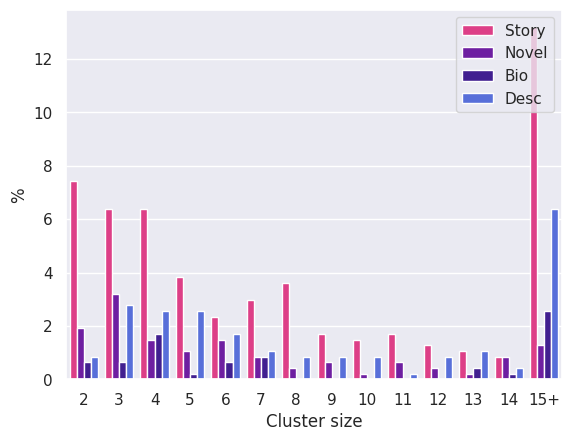

In [45]:
benco_path = 'train/data'
litbank_path = ''
data = []
print("loading LitBank......")

df_litbank = pd.read_json((litbank_path+'litBank.json'), encoding='utf8')

print("loading benco......\n")
story_df = pd.read_json((benco_path+'/story.json'), encoding='utf8')
novel_df = pd.read_json((benco_path+'/novel.json'), encoding='utf8')
bio_df = pd.read_json((benco_path+'/biography.json'), encoding='utf8')
dev_df = pd.read_json((benco_path+'/descriptive.json'), encoding='utf8')


story_df.reset_index(drop=True, inplace=True)
story_df = story_df.set_index('id')

novel_df.reset_index(drop=True, inplace=True)
novel_df = novel_df.set_index('id')

bio_df.reset_index(drop=True, inplace=True)
bio_df = bio_df.set_index('id')

dev_df.reset_index(drop=True, inplace=True)
dev_df = dev_df.set_index('id')
#df_benco = pd.concat([novel_df, story_df, bio_df, dev_df])
#df_benco.reset_index(drop=True, inplace=True)
#df_benco = df_benco.set_index('id')

# size and property comparison
df_story_clusters = Counter()
df_novel_clusters = Counter()
df_bio_clusters = Counter()
df_dev_clusters = Counter()

df_story_doc = Counter()
df_novel_doc = Counter()
df_bio_doc = Counter()
df_dev_doc = Counter()

mention_clusters_length(story_df, df_story_clusters)
mention_clusters_length(novel_df, df_novel_clusters)
mention_clusters_length(bio_df, df_bio_clusters)
mention_clusters_length(dev_df, df_dev_clusters)

sentences_length(story_df, df_story_doc)
sentences_length(novel_df, df_novel_doc)
sentences_length(bio_df, df_bio_doc)
sentences_length(dev_df, df_dev_doc)


# print statements
# print("Number Of Texts: \nLitBank Dataset: {}\nbenco Dataset: {}\n".format(len(df_litbank), len(df_benco)))
# print("Text Length (Number token in a text): \nLitBank Dataset: Max-> {}, Min-> {}".format(max(df_litbank_doc), min(df_litbank_doc)))
# print("benco Dataset: Max-> {}, Min-> {}\n".format(max(df_benco_doc), min(df_benco_doc)))
# print("Mention Clusters Length: \nlitbank Dataset: Max-> {}, Min-> {}".format(max(df_litbank_clusters), min(df_litbank_clusters)))
# print("benco Dataset: Max-> {}, Min-> {}\n".format(max(df_benco_clusters), min(df_benco_clusters)))


total_tag_story = sum(np.fromiter(df_story_clusters.keys(), dtype=int)*np.fromiter(df_story_clusters.values(), dtype=int))
total_tag_novel = sum(np.fromiter(df_novel_clusters.keys(), dtype=int)*np.fromiter(df_novel_clusters.values(), dtype=int))
total_tag_bio = sum(np.fromiter(df_bio_clusters.keys(), dtype=int)*np.fromiter(df_bio_clusters.values(), dtype=int))
total_tag_dev = sum(np.fromiter(df_dev_clusters.keys(), dtype=int)*np.fromiter(df_dev_clusters.values(), dtype=int))



# print statements
# print("Total Mention Clusters: \nLitBank Dataset: {}\nbenco Dataset: {}\n".format(sum(df_litbank_clusters.values()), sum(df_benco_clusters.values())))
# print("Total Mentions: \nLitBank Dataset: {}\nbenco Dataset: {}\n".format(total_tag_litbank, total_tag_benco))

story_tokens = total_token_count(story_df)
novel_tokens = total_token_count(novel_df)
bio_tokens = total_token_count(bio_df)
dev_tokens = total_token_count(dev_df)


# print statements
# print("total tokens LitBank: {}".format(pre_tokens))
print("total tokens story: {}\n".format(story_tokens))
print("total tokens novel: {}\n".format(novel_tokens))
print("total tokens bio: {}\n".format(bio_tokens))
print("total tokens dev: {}\n".format(dev_tokens))
print("DONE"*12)

#without_singleton = total_tag_litbank - df_litbank_clusters[1]
#cluster_without = sum(df_litbank_clusters.values())-df_litbank_clusters[1]
#total_mention_token_pre_sig = singleton_mention_len_count(df_litbank)
# total_mention_token_bn_sig = singleton_mention_len_count(story_df)

# #total_mention_token_pre = mention_len_count(df_litbank)
total_mention_token_bn = mention_len_count(story_df)

# print statements
# print("total token in singleton mention LitBank: {}".format(total_mention_token_pre_sig))
# print("total token in singleton mention benco: {}\n".format(total_mention_token_bn_sig))

# print("Without Singleton cluster:")
# print("total mention (LitBank): {}".format(without_singleton))
# print("total cluster (LitBank): {}".format(cluster_without))
# print("total token in mention LitBank: {}".format(total_mention_token_pre))
# print("total token in mention benco: {}\n".format(total_mention_token_bn))

print_mean_std(story_df, "Story")
print_mean_std(novel_df, "Novel")
print_mean_std(bio_df, "Biography")
print_mean_std(dev_df, "Descriptive")

bn_cluster = sum(df_story_clusters.values())
bn_cluster = bn_cluster + sum(df_novel_clusters.values())
bn_cluster = bn_cluster + sum(df_bio_clusters.values())
bn_cluster = bn_cluster + sum(df_dev_clusters.values())

story_percentage = calculate_cluster_percentage(df_story_clusters, bn_cluster)
novel_percentage = calculate_cluster_percentage(df_novel_clusters, bn_cluster)
bio_percentage = calculate_cluster_percentage(df_bio_clusters, bn_cluster)
dev_percentage = calculate_cluster_percentage(df_dev_clusters, bn_cluster)

label = ['Story']*len(story_percentage)
label2 = ['Novel']*len(novel_percentage)
label3 = ['Bio']*len(bio_percentage)
label4 = ['Desc']*len(dev_percentage)

story_df = pd.DataFrame.from_dict(data={'Cluster size':list(story_percentage.keys()), '%':list(story_percentage.values()),'label':label})
novel_df = pd.DataFrame.from_dict(data={'Cluster size':list(novel_percentage.keys()),'%':list(novel_percentage.values()),'label':label2})
bio_df = pd.DataFrame.from_dict(data={'Cluster size':list(bio_percentage.keys()),'%':list(bio_percentage.values()),'label':label3})
dev_df = pd.DataFrame.from_dict(data={'Cluster size':list(dev_percentage.keys()),'%':list(dev_percentage.values()),'label':label4})

df = pd.concat([story_df, novel_df, bio_df, dev_df])
df.reset_index(drop=True, inplace=True)

sns.set_theme()
palette = sns.color_palette("icefire", 5)
#palette = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

ax =sns.barplot(x='Cluster size', y='%', hue='label', data = df, palette=palette)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
la = ax.get_xticklabels()
la[-1] = '15+'
ax.legend(loc='upper right')
ax.set_xticklabels(la)
fig = ax.get_figure()
fig.savefig("cluster_percentage.png", dpi=800)
plt.show()
plt.clf()
plt.cla()
plt.close()


In [19]:
df_story_clusters.values()

dict_values([35, 14, 30, 6, 18, 3, 17, 7, 11, 3, 30, 4, 5, 3, 8, 5, 2, 4, 8, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 4, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [13]:
data_dict = {
    "Story": {"Clusters": 0, "Mentions": 0, "Tokens": 0},
    "Novel": {"Clusters": 0, "Mentions": 0, "Tokens": 0},
    "Biography": {"Clusters": 0, "Mentions": 0, "Tokens": 0},
    "Descriptive": {"Clusters": 0, "Mentions": 0, "Tokens": 0}
    }

data_dict = distribution_per_category(story_df, data_dict, 'Story')
data_dict = distribution_per_category(novel_df, data_dict, 'Novel')
data_dict = distribution_per_category(bio_df, data_dict, 'Biography')
data_dict = distribution_per_category(dev_df, data_dict, 'Descriptive')

for key, value in data_dict.items():
    data_dict[key] = {"Clusters": ((data_dict[key]['Clusters']*100.0)/bn_cluster), "Mentions": ((data_dict[key]['Mentions']*100.0)/total_tag_benco), "Tokens": ((data_dict[key]['Tokens']*100.0)/bn_tokens)}

percen = pd.DataFrame.from_dict(data_dict).T
percen = percen.reset_index()
mentions = percen.loc[:,['index', 'Mentions']]
clusters = percen.loc[:,['index', 'Clusters']]
tokens = percen.loc[:,['index', 'Tokens']]
del percen

label = ['Cluster']*4
label2 = ['Mention']*4
label3 = ['Token']*4
clusters = pd.concat([clusters, pd.DataFrame(label)], axis=1)
mentions = pd.concat([mentions, pd.DataFrame(label2)], axis=1)
tokens = pd.concat([tokens, pd.DataFrame(label3)], axis=1)

mentions.rename(columns={'Mentions': '%', 'index':'Categories'}, inplace = True)
clusters.rename(columns={'Clusters': '%', 'index':'Categories'}, inplace = True)
tokens.rename(columns={'Tokens': '%', 'index':'Categories'}, inplace = True)
df = pd.concat([clusters, mentions, tokens])
palette = sns.color_palette("PRGn", 8)
ax =sns.barplot(x='Categories', y='%', hue=0, data = df, palette=palette)
fig = ax.get_figure()
ax.legend(loc='upper right')
fig.savefig("distribution.png", dpi=800)
plt.clf()
plt.cla()
plt.close()

In [15]:
temp = {}
temp['all'] = spread(df_benco)

x_val = [*range(0,1001,100)]
bio = count(temp['all'], x_val)
drop = []
for i in range(len(x_val)):
    if bio[i]==0:
        drop.append(i)
for i in drop[::-1]:
    del x_val[i]
    del bio[i]
df = pd.DataFrame([x_val, bio]).T
label = ['BenCo']*len(df)

    
df = pd.concat([df, pd.DataFrame(label, columns={2})], axis=1)
df.rename(columns={0:'Spread', 1:'Count', 2:0}, inplace=True)
temp2 = {}
temp2['all'] = spread(df_litbank)

x_val2 = [*range(0,1001,100)]
bio2 = count(temp2['all'], x_val2)
drop2 = []
for i in range(len(x_val2)):
    if bio2[i]==0:
        drop2.append(i)
for i in drop2[::-1]:
    del x_val2[i]
    del bio2[i]
df2 = pd.DataFrame([x_val2, bio2]).T

label = ['LitBank']*len(df2)
df2 = pd.concat([df2, pd.DataFrame(label, columns={2})], axis=1)
df2.rename(columns={0:'Spread', 1:'Count', 2:0}, inplace=True)
df = pd.concat([df, df2])
ax =sns.barplot(x='Spread', y='Count', hue=0, data = df)
ax.legend(loc='upper right')
ax.set_yscale('log')
fig = ax.get_figure()
fig.savefig("spread.png", dpi=800)
plt.clf()
plt.cla()
plt.close()
print("Figures Saved!!")

Figures Saved!!
